# Классификация и оценка качества классификации

## Используемый датасет

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Attribute Information:

1. Sepal (чашелистик) length in cm
2. Sepal width in cm
3. Petal (лепесток) length in cm
4. Petal width in cm
5. Class:
    - Iris Setosa
    - Iris Versicolour
    - Iris Virginica


## Задание

Множество данных об ирисах разбито на два равномощных множества (в датасете всего 150 экземпляров данных, так что в каждом множестве - 75 экземпляров) так, чтобы в каждом из множеств было по 25 экзамепляров каждого класса ирисов.

Проведена классификация экземпляров второго множества на основе данных из первого. Результаты классификации представлены в виде двумерных точечных графиков по лепесткам и чашелистикам.

Затем результаты классификации сравниваются с фактами и оценивается качество классификации.

In [14]:
import pandas as pd
import numpy as np

df = pd.read_csv("iris.data", delimiter=",")
df.head(10)

,sepalLength,sepalWidth,petalLength,petalWidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [47]:
# Нормализация исходных данных

from sklearn import preprocessing

df_mm = preprocessing.MinMaxScaler().fit_transform(df[['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']])
df[['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']] = df_mm
print("Нормализованные данные:")
df.head(10)

Нормализованные данные:


,sepalLength,sepalWidth,petalLength,petalWidth,class
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa
5,0.305556,0.791667,0.118644,0.125000,Iris-setosa
6,0.083333,0.583333,0.067797,0.083333,Iris-setosa
7,0.194444,0.583333,0.084746,0.041667,Iris-setosa
8,0.027778,0.375000,0.067797,0.041667,Iris-setosa
9,0.166667,0.458333,0.084746,0.000000,Iris-setosa


In [48]:
def d(x, y):
    p = len(x)
    return sum(abs(xi - yi)**p for xi, yi in zip(x, y))**(1/p)

In [93]:
# Разбиение на два множества

set1 = pd.DataFrame(columns=['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'class'])
for irisClass in df['class'].unique():
    set1 = pd.concat([set1, df[df['class'] == irisClass].head(25)])
    
set2 = pd.DataFrame(columns=['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'class'])
for irisClass in df['class'].unique():
    set2 = pd.concat([set2, df[df['class'] == irisClass].tail(25)])

In [120]:
# Поиск k ближайших соседей

k = 3
set1['distance'] = 0.0
set2['predictedClass'] = ""
predicted = []

for i, unknown in set2.iterrows():
    set1['distance'] = d([set1['sepalLength'], set1['sepalWidth'], set1['petalLength'], set1['petalWidth']], unknown[0:3])
    neighbours = set1.sort_values(by='distance', ascending=True).head(k)
    
    # Взвешенное голосование
    
    bestFittingClass = ""
    min = -1
    for irisClass in neighbours['class'].unique():
        votes = sum(d(unknown[0:3], neighbour[0:3])**2 for j, neighbour in neighbours[neighbours['class'] == irisClass].iterrows())
        if (min < 0 or votes > max):
            bestFittingClass = irisClass
            max = votes
    unknown['predictedClass'] = bestFittingClass
    predicted.append(bestFittingClass)
    
set2['predictedClass'] = predicted
del set1['distance']

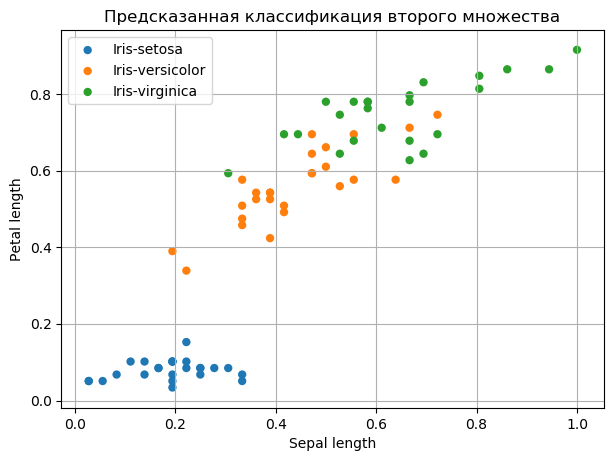

In [131]:
# Построение точечного графика классификации

import matplotlib.pyplot as plt; plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

fig, ax = plt.subplots()
color = 0
colors = ['tab:blue', 'tab:orange', 'tab:green']
for irisClass in set2['predictedClass'].unique():
    filtered = set2[set2['predictedClass'] == irisClass]
    ax.scatter(filtered['sepalLength'], filtered['petalLength'], c=colors[color], label=irisClass, edgecolors='none')
    color += 1

plt.xlabel('Sepal length')
plt.ylabel('Petal length')  
plt.title('Предсказанная классификация второго множества')
ax.legend()
ax.grid(True)
plt.show()

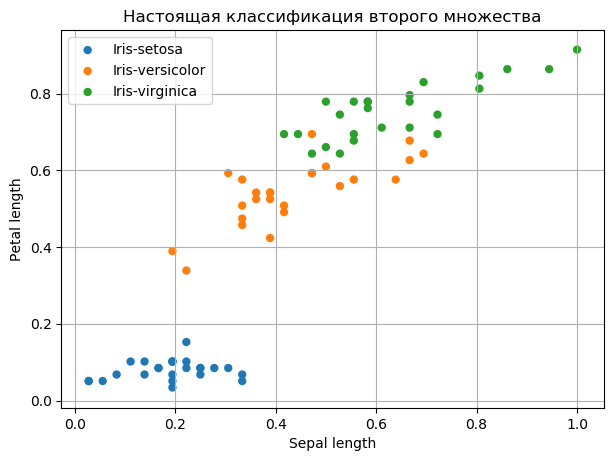

In [132]:
# Построение точечного графика классификации

import matplotlib.pyplot as plt; plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

fig, ax = plt.subplots()
color = 0
colors = ['tab:blue', 'tab:orange', 'tab:green']
for irisClass in set2['class'].unique():
    filtered = set2[set2['class'] == irisClass]
    ax.scatter(filtered['sepalLength'], filtered['petalLength'], c=colors[color], label=irisClass, edgecolors='none')
    color += 1

plt.xlabel('Sepal length')
plt.ylabel('Petal length')  
plt.title('Настоящая классификация второго множества')
ax.legend()
ax.grid(True)
plt.show()

In [162]:
# Построение Confusion Matrix

#confusion matrix
m = [[0 for x in range(3)] for y in range(3)] 

classes = set2['class'].unique()

for i in range(0, 3):
    for j in range(0, 3):
        m[i][j] = len(set2[(set2['predictedClass'] == classes[i]) & (set2['class'] == classes[j])])

# Вычисление точности, полноты и F-меры
        
precision = [m[i][i]/sum(m[i][j] for j in range(0, 3)) for i in range(0, 3)]
recall = [m[i][i]/sum(m[j][i] for j in range(0, 3)) for i in range(0, 3)]
fMeasure = [2 * precision[i] * recall[i] / (precision[i] + recall[i]) for i in range(0, 3)]

for i in range(0, 3):
    print(classes[i] + ":")
    print(f"  Precision = {precision[i]:.6f}")
    print(f"  Recall    = {recall[i]:.6f}")
    print(f"  F-measure = {fMeasure[i]:.6f}")
    print("")

Iris-setosa:
  Precision = 1.000000
  Recall    = 1.000000
  F-measure = 1.000000

Iris-versicolor:
  Precision = 0.807692
  Recall    = 0.840000
  F-measure = 0.823529

Iris-virginica:
  Precision = 0.833333
  Recall    = 0.800000
  F-measure = 0.816327

